In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import pickle
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
data = pd.read_pickle('dtm.pkl')
data = data.transpose()

cleaned_data = pd.read_pickle('cleaned_corpus.pkl')

In [8]:
data.head()

,louis,dave,ricky,bo,bill,jim,john,hasan,ali,anthony,mike,joe
aaaaah,0,0,0,0,1,0,0,0,0,0,0,0
aaaaahhhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaaauuugghhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaahhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaah,0,1,0,0,0,0,0,0,0,0,0,0


In [9]:
wc = WordCloud(background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

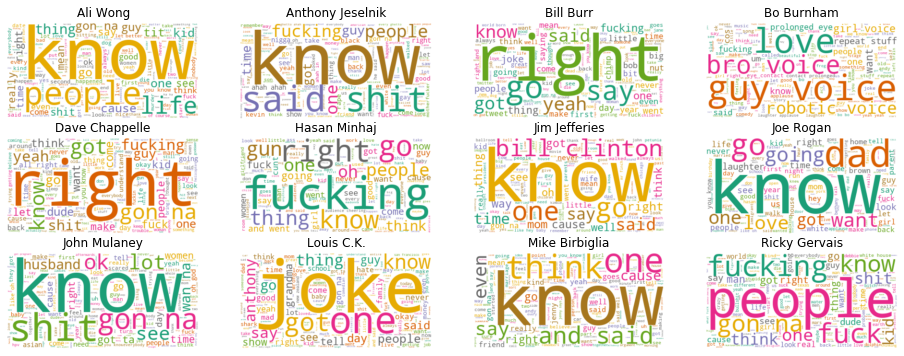

In [10]:
plt.rcParams['figure.figsize'] = [16, 6]

full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Hasan Minhaj',
              'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais']

for index, comedian in enumerate(data.columns):
    wc.generate(cleaned_data.transcript[comedian])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])

In [11]:
# Number of words - vocabulary of each comedian

In [12]:
# number of unique words that each comedian uses.
unique_list = []
for comedian in data.columns:
    uniques = data[comedian].to_numpy().nonzero()[0].size
    unique_list.append(uniques)
    
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['comedian', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort
    

,comedian,unique_words
9,Louis C.K.,1067
0,Ali Wong,1169
3,Bo Burnham,1389
8,John Mulaney,1406
5,Hasan Minhaj,1434
6,Jim Jefferies,1467
1,Anthony Jeselnik,1471
11,Ricky Gervais,1549
10,Mike Birbiglia,1564
7,Joe Rogan,1681


In [13]:
# total number of words each comedian uses
total_list = []
for comedian in data.columns:
    totals = sum(data[comedian])
    total_list.append(totals)
    
# Comedy special run times from IMDB, in minutes
run_times = [60, 59, 80, 60, 67, 73, 77, 63, 62, 58, 76, 79]

data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort

,comedian,unique_words,total_words,run_times,words_per_minute
8,John Mulaney,1406,3079,62,49.661290
6,Jim Jefferies,1467,3912,77,50.805195
9,Louis C.K.,1067,2949,58,50.844828
0,Ali Wong,1169,3167,60,52.783333
11,Ricky Gervais,1549,4361,79,55.202532
10,Mike Birbiglia,1564,4268,76,56.157895
2,Bill Burr,1713,4874,80,60.925000
3,Bo Burnham,1389,3679,60,61.316667
5,Hasan Minhaj,1434,4750,73,65.068493
1,Anthony Jeselnik,1471,4013,59,68.016949


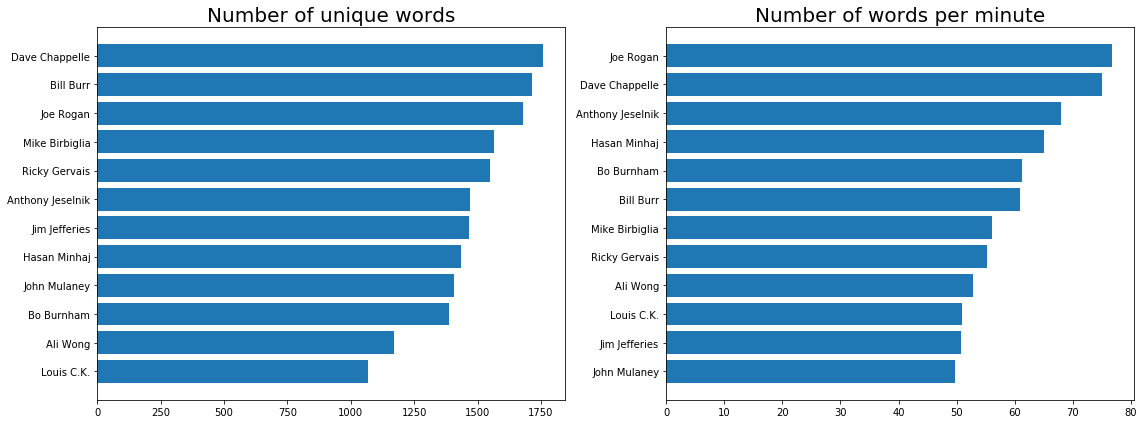

In [14]:
y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.comedian)
plt.title('Number of unique words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.comedian)
plt.title('Number of words per minute', fontsize=20)

plt.tight_layout()
plt.show()

In [15]:
# amount of profanity

In [16]:
data_bad_words = data.transpose()[['fucking', 'fuck', 'shit']]
data_profanity = pd.concat([data_bad_words.fucking + data_bad_words.fuck, data_bad_words.shit], axis=1)
data_profanity.columns = ['f_word', 's_word']
data_profanity

,f_word,s_word
louis,21,25
dave,65,46
ricky,62,6
bo,37,7
bill,106,64
jim,116,20
john,4,6
hasan,24,15
ali,16,34
anthony,15,9


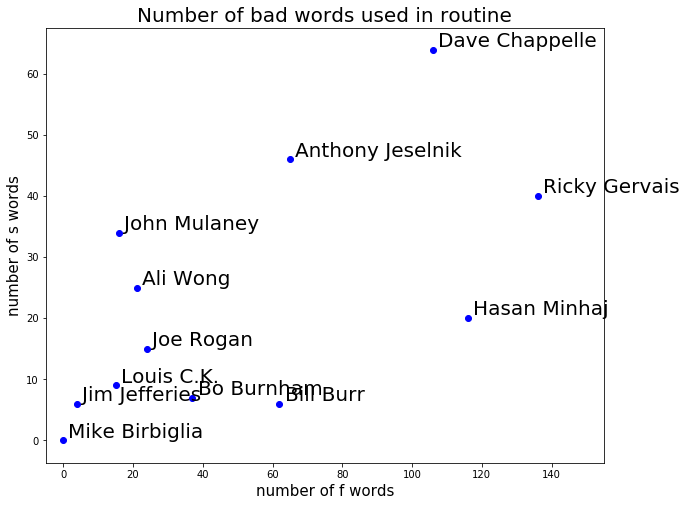

In [17]:
plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(data_profanity.index):
    x = data_profanity.f_word.loc[comedian]
    y = data_profanity.s_word.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=20)
    plt.xlim(-5, 155)
    
plt.title('Number of bad words used in routine', fontsize=20)
plt.xlabel('number of f words', fontsize=15)
plt.ylabel('number of s words', fontsize=15)
plt.show()